<a href="https://colab.research.google.com/github/mashinakatherina/Big-Data-analysis-and-training/blob/trunk/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
# Загрузка данных в Spark DataFrame
# df = spark.read.option('header', True).csv("daily_weather.csv")
df = spark.read.load("daily_weather.csv.csv", 
                      format='com.databricks.spark.csv', 
                      header='true',inferSchema='true') 

In [5]:
df.show()

+------+-----------------+------------------+----------------------+------------------+----------------------+------------------+---------------------+-----------------+---------------------+---------------------+
|number| air_pressure_9am|      air_temp_9am|avg_wind_direction_9am|avg_wind_speed_9am|max_wind_direction_9am|max_wind_speed_9am|rain_accumulation_9am|rain_duration_9am|relative_humidity_9am|relative_humidity_3pm|
+------+-----------------+------------------+----------------------+------------------+----------------------+------------------+---------------------+-----------------+---------------------+---------------------+
|     0|918.0600000000087| 74.82200000000041|                 271.1| 2.080354199999768|    295.39999999999986| 2.863283199999908|                  0.0|              0.0|    42.42000000000046|   36.160000000000494|
|     1|917.3476881177097| 71.40384263106537|    101.93517935618371|2.4430092157340217|    140.47154847112498|3.5333236016106238|               

In [6]:
df.columns # просмотреть столбцы

['number',
 'air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'relative_humidity_9am',
 'relative_humidity_3pm']

In [7]:
df.printSchema() # вывод типов данных столбцов

root
 |-- number: integer (nullable = true)
 |-- air_pressure_9am: double (nullable = true)
 |-- air_temp_9am: double (nullable = true)
 |-- avg_wind_direction_9am: double (nullable = true)
 |-- avg_wind_speed_9am: double (nullable = true)
 |-- max_wind_direction_9am: double (nullable = true)
 |-- max_wind_speed_9am: double (nullable = true)
 |-- rain_accumulation_9am: double (nullable = true)
 |-- rain_duration_9am: double (nullable = true)
 |-- relative_humidity_9am: double (nullable = true)
 |-- relative_humidity_3pm: double (nullable = true)



In [8]:
df.describe().toPandas().transpose() # сводная статистика по датафрейму

,0,1,2,3,4
summary,count,mean,stddev,min,max
number,1095,547.0,316.24357700987383,0,1094
air_pressure_9am,1092,918.8825513138094,3.184161180386833,907.9900000000024,929.3200000000012
air_temp_9am,1090,64.93300141287072,11.175514003175877,36.752000000000685,98.90599999999992
avg_wind_direction_9am,1091,142.2355107005759,69.13785928889189,15.500000000000046,343.4
avg_wind_speed_9am,1092,5.50828424225493,4.5528134655317185,0.69345139999974,23.554978199999763
max_wind_direction_9am,1092,148.95351796516923,67.23801294602953,28.89999999999991,312.19999999999993
max_wind_speed_9am,1091,7.019513529175272,5.598209170780958,1.1855782000000479,29.84077959999996
rain_accumulation_9am,1089,0.20307895225211126,1.5939521253574893,0.0,24.01999999999907
rain_duration_9am,1092,294.1080522756142,1598.0787786601481,0.0,17704.0


In [9]:
df.describe(['air_temp_9am']).show() # сводная статистика по отдельному столбцу

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1090|
|   mean| 64.93300141287072|
| stddev|11.175514003175877|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+



In [10]:
len(df.columns) # количество столбцов 

11

In [11]:
df.count() # количество строк

1095

In [12]:
# удалим строки с пропущенными значениями в столбце air_pressure_9am
df2=df.na.drop(subset=['air_temp_9am'])

In [13]:
df2.count()

1090

In [14]:
from pyspark.sql.functions import avg

imputeDF = df

In [15]:
for x in imputeDF.columns:
    meanValue = df2.agg(avg(x)).first()[0]
    print(x, meanValue)
    imputeDF = imputeDF.na.fill(meanValue, [x])

number 546.8256880733945
air_pressure_9am 918.8833281182478
air_temp_9am 64.93300141287072
avg_wind_direction_9am 142.19559679647966
avg_wind_speed_9am 5.516615074808091
max_wind_direction_9am 148.87405226312185
max_wind_speed_9am 7.030251646918073
rain_accumulation_9am 0.20401566328648446
rain_duration_9am 295.460895202365
relative_humidity_9am 34.286931549494355
relative_humidity_3pm 35.37023074361628


In [16]:
df.describe(['air_temp_9am']).show()
imputeDF.describe(['air_temp_9am']).show()

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1090|
|   mean| 64.93300141287072|
| stddev|11.175514003175877|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1095|
|   mean| 64.93300141287071|
| stddev|11.149946561759078|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+



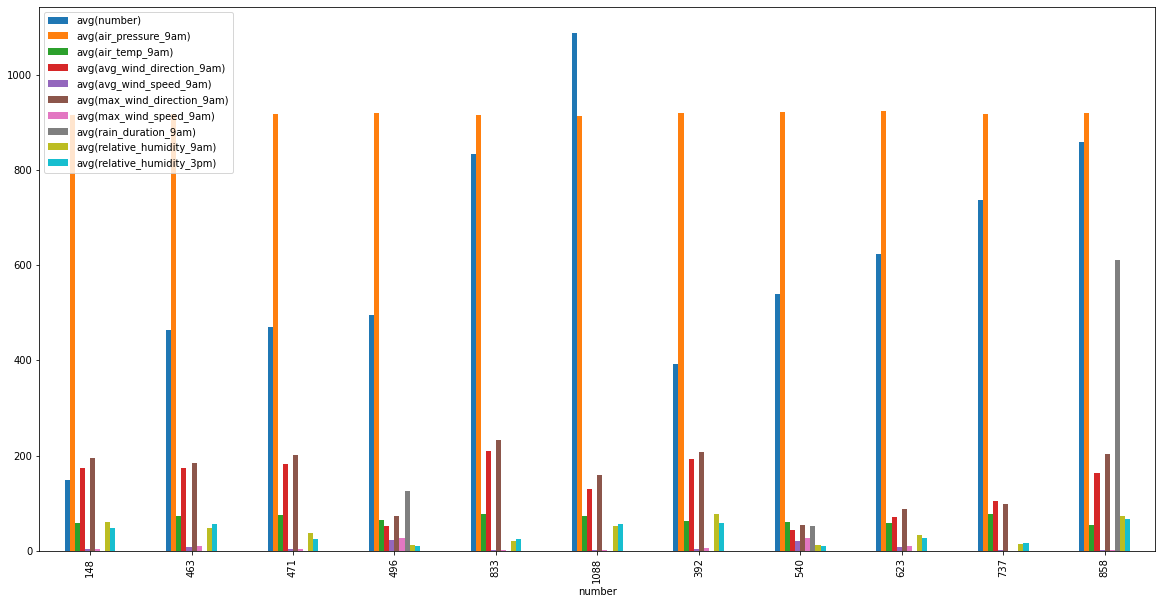

In [47]:
from matplotlib import pyplot as plt

sec_df =  df.select([ 'number',
                      'air_pressure_9am',
                      'air_temp_9am',
                      'avg_wind_direction_9am',
                      'avg_wind_speed_9am',
                      'max_wind_direction_9am',
                      'max_wind_speed_9am',
                      'rain_duration_9am',
                      'relative_humidity_9am',
                      'relative_humidity_3pm']
                     )\
                     .groupBy('number')\
                     .mean()\
                     .toPandas()

ind = list(range(12))
ind.pop(6)

sec_df.iloc[ind ,:].plot(kind='bar', x='number', y=sec_df.columns.tolist()[1:], figsize=(20, 10))
plt.show()

In [48]:
df2.stat.corr("rain_accumulation_9am", "rain_duration_9am")

0.7337737589869374

Part **2**

У меня не получилось скачать датасет с kaggle поэтому остальные задания сделала так же на датасете про погоду

In [82]:
import pandas as pd
import numpy as np

In [55]:
df3 = df2.toPandas()

In [64]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler
df_std = pd.DataFrame(std_scaler.fit_transform(df3), columns=df3.columns)

df_std

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,-1.732609,-0.258387,0.885287,1.863495,-0.754148,2.178348,-0.743773,-0.127763,-0.184560,0.319036,0.035043
1,-1.729440,-0.481934,0.579285,-0.582021,-0.674557,-0.124917,-0.624176,-0.127763,-0.184560,-0.390631,-0.707445
2,-1.726272,1.304498,-0.384499,-1.318361,2.535124,-1.266252,2.690011,-0.127763,-0.172067,-0.995852,-0.927821
3,-1.723103,0.508227,0.466044,0.818761,-0.258808,0.926627,-0.328463,-0.127763,-0.184560,-0.866831,-1.004027
4,-1.719935,0.714493,-1.847653,1.960353,-0.803242,-0.183961,-0.743773,5.445778,9.016563,2.279991,1.835644
...,...,...,...,...,...,...,...,...,...,...,...
1085,1.721040,0.005232,-0.163737,0.733004,-0.361400,0.868597,-0.324532,-0.127763,-0.184560,-0.324287,0.124674
1086,1.724208,-0.054396,-1.375512,1.437031,-0.813061,1.167417,-0.831614,-0.127763,-0.184560,2.199184,1.684780
1087,1.727377,-0.716582,0.551727,0.680961,-0.538137,0.771964,-0.560106,-0.127763,-0.184560,0.443385,0.751645
1088,1.730545,-1.971912,-0.584313,0.440984,-0.371218,0.598025,-0.404387,-0.127763,-0.184560,1.198504,1.016544


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc331b0e750>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc331b0e590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc331add210>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc331b2bd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc341d99ed0>],
 'means': []}

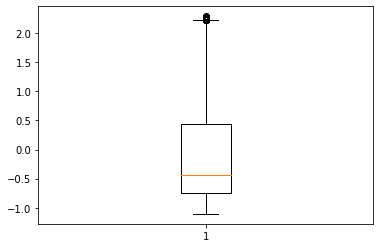

In [87]:
plt.boxplot(x=df_std['relative_humidity_9am'])

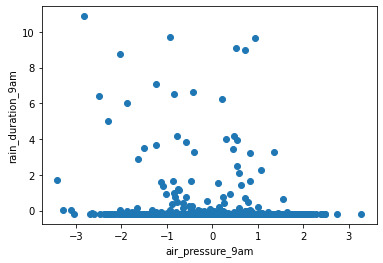

In [80]:
plt.xlabel("air_pressure_9am")
plt.ylabel("rain_duration_9am")
plt.scatter(x=df_std['air_pressure_9am'], y=df_std["rain_duration_9am"])

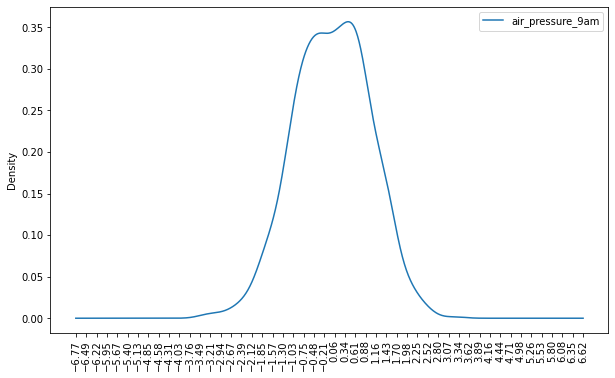

In [86]:
ax = df_std.plot(y='air_pressure_9am', x='rain_duration_9am', kind='kde', figsize=(10, 6))
arr = ax.get_children()[0]._x
plt.xticks(np.linspace(arr[0], arr[-1]), rotation=90)
plt.show()

In [85]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)

df_norm

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0.000000,0.472105,0.612511,0.779506,0.060665,0.940699,0.058548,0.000000,0.000000,0.419854,0.354917
1,0.000914,0.438710,0.557516,0.263602,0.076528,0.393828,0.081931,0.000000,0.000000,0.210779,0.162468
2,0.001828,0.705579,0.384304,0.108265,0.716243,0.122838,0.729899,0.000000,0.001130,0.032474,0.105348
3,0.002742,0.586627,0.537164,0.559110,0.159391,0.643499,0.139747,0.000000,0.000000,0.070485,0.085596
4,0.003656,0.617440,0.121344,0.799939,0.050881,0.379809,0.058548,0.370525,0.832015,0.997573,0.821622
...,...,...,...,...,...,...,...,...,...,...,...
1085,0.996344,0.511486,0.423979,0.541019,0.138943,0.629721,0.140515,0.000000,0.000000,0.230325,0.378148
1086,0.997258,0.502579,0.206198,0.689539,0.048924,0.700671,0.041374,0.000000,0.000000,0.973766,0.782519
1087,0.998172,0.403657,0.552563,0.530040,0.103718,0.606777,0.094457,0.000000,0.000000,0.456489,0.540656
1088,0.999086,0.216128,0.348393,0.479414,0.136986,0.565478,0.124902,0.000000,0.000000,0.678955,0.609316


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc331c0ae90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc331bf1d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc331c0ac50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc331b97450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc331b97810>],
 'means': []}

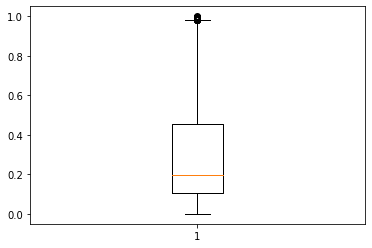

In [88]:
plt.boxplot(x=df_norm['relative_humidity_9am'])

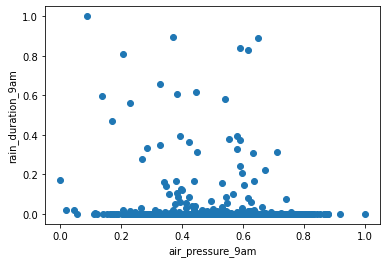

In [89]:
plt.xlabel("air_pressure_9am")
plt.ylabel("rain_duration_9am")
plt.scatter(x=df_norm['air_pressure_9am'], y=df_norm["rain_duration_9am"])

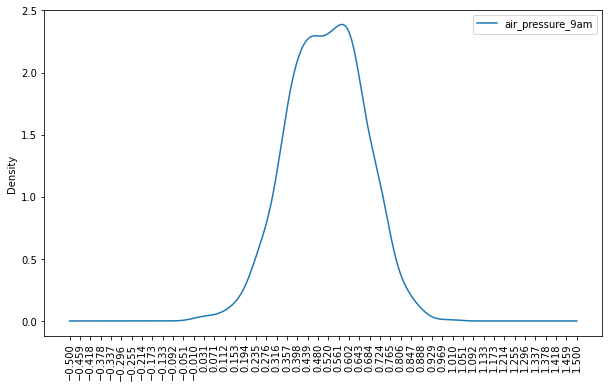

In [90]:
ax = df_norm.plot(y='air_pressure_9am', x='rain_duration_9am', kind='kde', figsize=(10, 6))
arr = ax.get_children()[0]._x
plt.xticks(np.linspace(arr[0], arr[-1]), rotation=90)
plt.show()